In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
import sidetable

### VISUALIZACIÓN

In [2]:
df = pd.read_csv('../datos/Dataframe_final.csv', index_col = 0)
df.head()

,edades,genero,salarios,paises,titulo_academico,puesto_trabajo,años_experiencia,sector_laboral,tamaños_empresa,lenguaje_programacion
0,45-59,Hombre,bajo,Belgica,Grado Universitario,Data Analyst,20+ years,Energía/Minería,Grande,"Python, SQL"
1,18-29,No binario,No sabe/No contesta,Estados Unidos,Estudios Univertarios sin licenciatura,Data Analyst,< 1 years,Fabricación,Mediana,R
2,30-44,Mujes,bajo,Egipto,Grado Universitario,Data Analyst,3-5 years,ONG/Servicio,Startup,Python
3,18-29,Hombre,No sabe/No contesta,China,Estudios Univertarios sin licenciatura,Data Analyst,< 1 years,Tecnológico,Startup,"Python, SQL, C, C++, Java, Javascript, MATLAB"
4,30-44,Hombre,medio,Sudafrica,Master,Data Analyst,1-3 years,Fabricación,Mediana,"R, SQL"


In [3]:
df.dtypes

edades                   object
genero                   object
salarios                 object
paises                   object
titulo_academico         object
puesto_trabajo           object
años_experiencia         object
sector_laboral           object
tamaños_empresa          object
lenguaje_programacion    object
dtype: object

- Gráfico sobre la Brecha de Género

In [4]:
df['genero'].unique()

array(['Hombre', 'No binario', 'Mujes', 'Prefiero no decirlo',
       'Prefiero no describirme'], dtype=object)

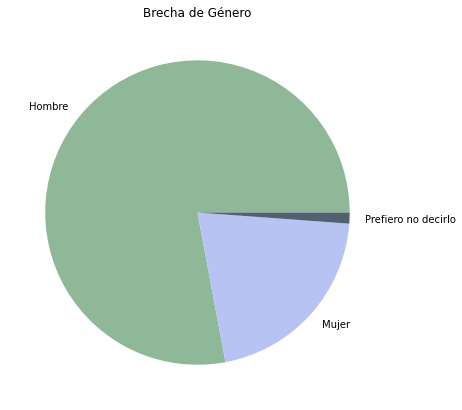

In [5]:
plt.figure(figsize =(10,7))

colors = ['#8EB897', '#B7C3F3', '#4F6272']

fig = plt.pie(df['genero'].value_counts().iloc[:3], labels = ['Hombre', 'Mujer', 'Prefiero no decirlo'], colors = colors)

plt.title('Brecha de Género');

Como se observa en la gráfica y en base a la encuesta de Kaggle, podemos comprobar que existe una gran brecha de género en el sector de análisis de datos. El X% de las personas encuestadas son hombres, el X% son mujeres y hay un pequeño porcentaje que ha preferido especificar el género. Como conclusión, este motivo no hace más que confirmar la importancia de la labor de Adalab al formar a mujeres para que puedan incorporarse a este sector de gran demanda.

- Gráfica Relación Edades y Género

In [6]:
df['genero'].unique()

array(['Hombre', 'No binario', 'Mujes', 'Prefiero no decirlo',
       'Prefiero no describirme'], dtype=object)

In [7]:
df_genero = df[(df['genero'] == 'Hombre') | (df['genero'] == 'Mujer')]
df_genero.head()

,edades,genero,salarios,paises,titulo_academico,puesto_trabajo,años_experiencia,sector_laboral,tamaños_empresa,lenguaje_programacion
0,45-59,Hombre,bajo,Belgica,Grado Universitario,Data Analyst,20+ years,Energía/Minería,Grande,"Python, SQL"
3,18-29,Hombre,No sabe/No contesta,China,Estudios Univertarios sin licenciatura,Data Analyst,< 1 years,Tecnológico,Startup,"Python, SQL, C, C++, Java, Javascript, MATLAB"
4,30-44,Hombre,medio,Sudafrica,Master,Data Analyst,1-3 years,Fabricación,Mediana,"R, SQL"
5,30-44,Hombre,alto,Otros,Master,Business Analyst,1-3 years,Contabilidad/Finanzas,Pequeña,"Python, SQL, Other"
7,30-44,Hombre,bajo,Otros,Master,Business Analyst,1-3 years,Servicio en línea/Servicios basados ​​en Internet,Grande,Python


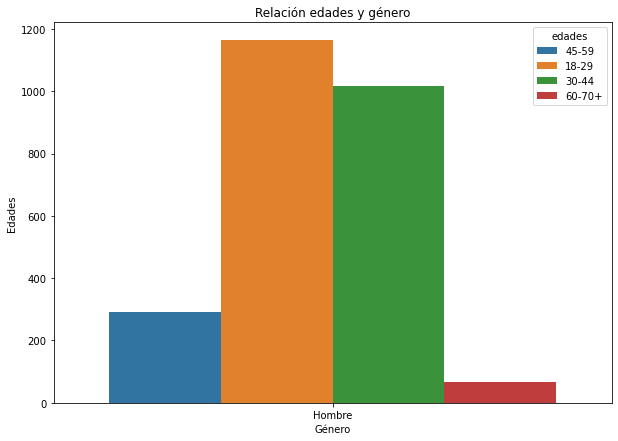

In [8]:
plt.figure(figsize =(10,7))

fig = sns.countplot(x = 'genero', data = df_genero, hue = 'edades')
fig.set( xlabel = 'Género', ylabel = 'Edades')

fig.set_title('Relación edades y género');

Como se observa en la gráfica y en base a la encuesta de Kaggle, podemos comprobar que a pesar de la evidente brecha de género, la proporción entre hombres y mujeres no varía dependiendo de la edad. Por otro lado, podemos comprobar que es una profesión que ha ido aumentado la demanda en los últimos años, ya que la franja de edad en la que se encuentran este tipo de profesionales es cada vez menor. Como conclusión, Adalab debe de seguir formando a mujeres de cualquier edad porque lo importante es que las en este sector.

- Gráfica Lenguajes de Programación

In [9]:
df["lenguaje_programacion"].unique()

array(['Python, SQL', ' R', 'Python',
       'Python, SQL, C, C++, Java, Javascript, MATLAB', ' R, SQL',
       'Python, SQL, Other', ' SQL, C++', ' R, SQL, C++', ' SQL',
       'Python, SQL, Javascript', 'Python, SQL, C, Javascript',
       'No sabe/No contesta', 'Python, SQL, C++, Other', 'Python, R, SQL',
       'Python, R, SQL, C, C++', 'Python, R', ' C++', 'Python, R, Other',
       ' None', 'Python, SQL, Java, Javascript', 'Python, R, MATLAB',
       'Python, R, SQL, C++, MATLAB', 'Python, SQL, C++',
       'Python, SQL, Javascript, Other', 'Python, R, SQL, MATLAB',
       'Python, SQL, MATLAB', 'Python, R, C, C++', 'Python, Javascript',
       'Python, SQL, Javascript, Bash', ' C, C++, MATLAB', 'Python, Java',
       ' SQL, Java', 'Python, R, SQL, Other',
       'Python, SQL, C++, Javascript, Bash', 'Python, C++, Java, MATLAB',
       'Python, Javascript, Other', 'Python, R, SQL, Javascript',
       'Python, C', 'Python, R, SQL, C, C++, Java',
       'Python, R, SQL, Java, Javas

In [10]:
df_lenguajes = pd.DataFrame(df["lenguaje_programacion"].value_counts())
df_lenguajes.head()

,lenguaje_programacion
"Python, SQL",622
Python,481
"Python, R, SQL",319
No sabe/No contesta,275
"Python, R",140


In [11]:
# Creamos una funcion que dividirá los strings de la columna lenguajes_programacion
def split_string(lenguajes):
    try:
        return [lenguaje.strip() for lenguaje in lenguajes.split(',')]
    except:
        return ["sin responder"]

In [12]:
df["lenguaje_programacion"].value_counts()

Python, SQL                                        622
Python                                             481
Python, R, SQL                                     319
No sabe/No contesta                                275
Python, R                                          140
                                                  ... 
Python, R, SQL, C, C++, Java, Javascript, Other      1
Python, R, Javascript, Bash                          1
Python, C, C++, Java, Other                          1
Python, R, SQL, Swift                                1
Python, R, SQL, Java, Javascript, Other              1
Name: lenguaje_programacion, Length: 251, dtype: int64

In [13]:
df['lenguaje_programacion'] = list(df['lenguaje_programacion'].apply(split_string))


In [14]:
# Contamos la frecuencia de cada lenguaje
# Creamos un diccionario en el que tendremos el conteo

conteo_lenguajes = {}
for lenguajes in df['lenguaje_programacion']:
    
        for lenguaje in lenguajes:
            if lenguaje in conteo_lenguajes:
                conteo_lenguajes[lenguaje] += 1
            else:
                conteo_lenguajes[lenguaje] = 1
print(conteo_lenguajes)

{'Python': 2465, 'SQL': 1866, 'R': 928, 'C': 240, 'C++': 288, 'Java': 300, 'Javascript': 327, 'MATLAB': 230, 'Other': 300, 'No sabe/No contesta': 275, 'None': 59, 'Bash': 131, 'Julia': 21, 'Swift': 20}


In [15]:
df_conteo_lenguajes = pd.DataFrame(conteo_lenguajes, index = [0]) 
df_conteo_lenguajes 

,Python,SQL,R,C,C++,Java,Javascript,MATLAB,Other,No sabe/No contesta,None,Bash,Julia,Swift
0,2465,1866,928,240,288,300,327,230,300,275,59,131,21,20


In [16]:
df_top5 = df_conteo_lenguajes.sum().sort_values(ascending = False).iloc[:5].reset_index()
df_top5

,index,0
0,Python,2465
1,SQL,1866
2,R,928
3,Javascript,327
4,Java,300


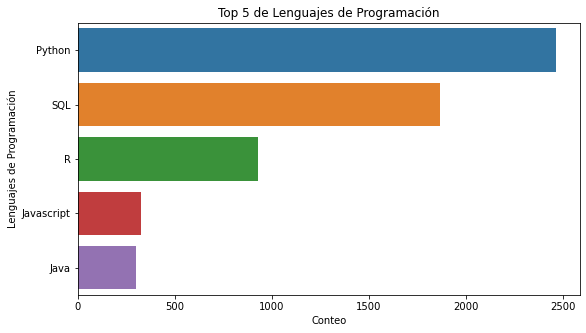

In [17]:
plt.figure(figsize = (9, 5))

fig = sns.barplot(x = 0 , y = 'index', data = df_top5)
fig.set(xlabel = 'Conteo', ylabel = 'Lenguajes de Programación')

fig.set_title('Top 5 de Lenguajes de Programación');

Como se observa en la gráfica y en base a la encuesta de Kaggle, podemos comprobar que los lenguajes de programación más utilizados son Python y SQL seguidos de R. Por lo tanto, en el futuro habría que comprobar que si la demanda de R va aumentando, Adalab podría plantearse impartir este tercer lenguaje de programación en sus cursos.

- Gráfica Países

In [18]:
df_paises = df["paises"].value_counts().iloc[:17].reset_index()
df_paises = df_paises[df_paises["index"] != 'Other']
df_paises

,index,paises
0,India,795
1,Estados Unidos,367
2,Otros,181
3,Nigeria,132
4,China,121
5,Brasil,110
6,Rusia,108
7,Egipto,101
8,Japon,84
9,Reino Unido,77


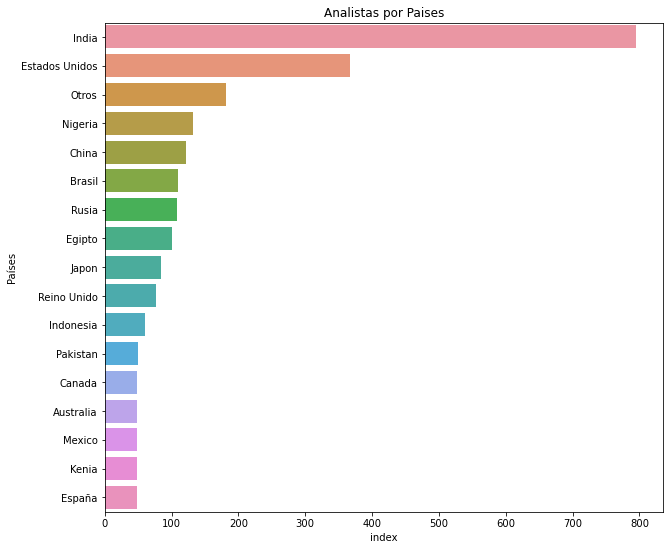

In [19]:
plt.figure(figsize =(10, 9))

fig = sns.barplot(x = 'paises', y = 'index', data = df_paises)
fig.set(xlabel = 'index', ylabel = 'Países')

fig.set_title('Analistas por Paises');

Como se observa en la gráfica y en base a la encuesta de Kaggle, podemos comprobar que el país con más analistas es la India. El motivo es que en este país promueven la formación matemática y tienen universidades muy destacadas en este campo. También, se encuentran grandes empresas que tienen su sede en este país, como es Oracle. Por otro lado, en Europa, España es el segundo país con más analistas detrás de Reino Unido, por lo que se prevee que hay una alta demanda de analistas de datos. Como conclusión, Adalab va por el camino correcto en haber implementado el nuevo Bootcamp de Data Analyst para que cada vez haya más profesionales en el sector en nuestro país. 

- Gráfica Relación Tamaño Empresa y Género

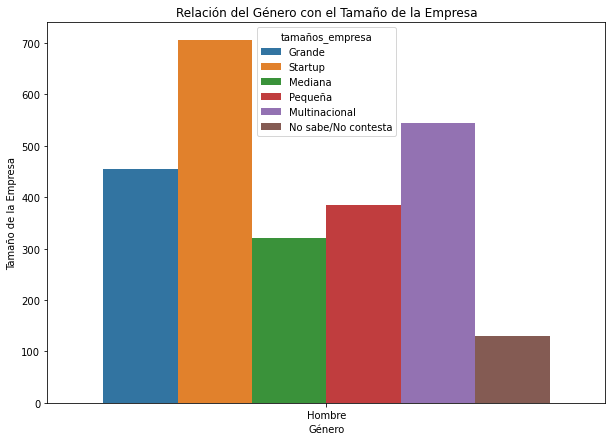

In [20]:
plt.figure(figsize =(10,7))

fig = sns.countplot(x = 'genero', data = df_genero, hue = 'tamaños_empresa')
fig.set( xlabel = 'Género', ylabel = 'Tamaño de la Empresa')

fig.set_title('Relación del Género con el Tamaño de la Empresa');

Como se observa en la gráfica y en base a la encuesta de Kaggle, podemos comprobar que en las empresas que más trabajan estos perfiles son en Startups seguido de las Multinacionales. Esto indica que las Startup y las Multinacionales son las empresas que más apuestan por este perfil. Esto es debido, a que las Multinacionales tienen más recursos económicos y también tienen gran interés porque recuperan el dinero invertido más la diferencia de toda la economía que trae la digitalización, y las Startup buscan el cambio constante en el sector de la tecnología.

- Gráfica Relación Sector Laboral con Puesto

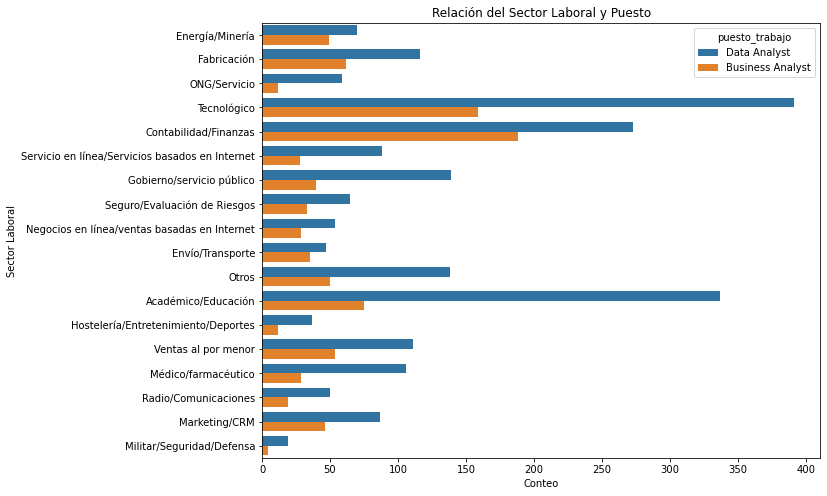

In [21]:
plt.figure(figsize = (10, 8))

fig = sns.countplot(y = 'sector_laboral', data = df, hue = 'puesto_trabajo')
fig.set(ylabel = 'Sector Laboral', xlabel = 'Conteo')

fig.set_title('Relación del Sector Laboral y Puesto');

Como se observa en la gráfica y en base a la encuesta de Kaggle, se puede comprobar que los analistas de datos se centran en los sectores de Tecnología, Educación y Finanzas. Como conclusión, sería de gran relevancia para Adalab que, por ejemplo, hicieran más hincapié en este tipo de temas para adaptar los proyectos de los diferentes módulos y así las alumnas estarán más acostumbradas a este tipo de información.


- Gráfica Relación Salarios y Género

In [22]:
lista_genero = ['Hombre', 'Mujer']

lista_salario = ['0-14K', '15K-39K', '+40K']  

In [23]:
df_salario_genero = df[df['genero'].isin(lista_genero)]

In [24]:
df_salario_genero = df_salario_genero[df_salario_genero['salarios'].isin(lista_salario)]

In [25]:
plt.figure(figsize =(10,7))

fig = sns.countplot(x = 'genero', data = df_salario_genero, hue = 'salarios')
fig.set( xlabel = 'Género', ylabel = 'Salarios')

fig.set_title('Relación del Género con el Salario');

ValueError: min() arg is an empty sequence

<Figure size 720x504 with 0 Axes>

Como se observa en la gráfica y en base a la encuesta de Kaggle, podemos comprobar que a pesar de la evidente brecha de género, la proporción entre hombres y mujeres no varía dependiendo del salario, ya que se aprecia que los hombres cobran más con las mujeres. También, podemos concluir que existen más altos cargos que son hombres respecto a mujeres, ya que los sueldos altos en hombres son muy elevados comparados con el sueldo alto de las mujeres. Como conclusión, Adalab va por el camino correcto en formar a mujeres, para que en un futuro puedan tener la posibilidad de tener un alto cargo en el sector data.